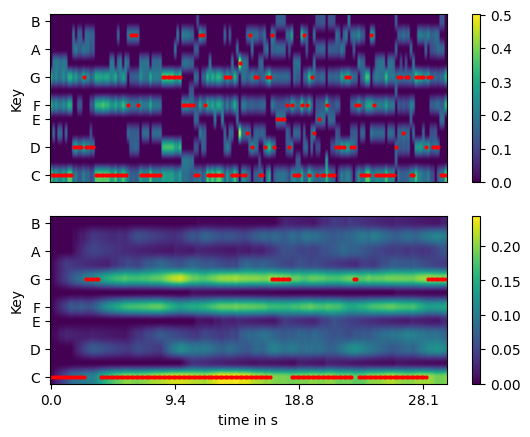

In [69]:
import librosa
import features
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mir_eval
import utils
import transcribe
import circularPitchSpace as cps
import itertools

start = 0
stop = 30
path = "/home/max/ET-TI/Masterarbeit/mirdata/beatles/"
# title = "06_-_Rubber_Soul/11_-_In_My_Life"
title = "12_-_Let_It_Be/06_-_Let_It_Be"
# title = "10CD1_-_The_Beatles/CD1_-_17_-_Julia"

y,sr = librosa.load(path+"/audio/"+title+".wav",offset=start,duration=stop-start)
target = mir_eval.io.load_labeled_intervals(path+"/annotations/chordlab/The Beatles/"+title+".lab",' ','#')
chroma = features.crpChroma(y)
time_vector = np.linspace(start, stop, chroma.shape[0], endpoint=False) 
rho_F,rho_FR,rho_TR,rho_DR = cps.transformChroma(chroma)
pc_energy = cps.getPitchClassEnergyProfile(chroma,threshold=0.6,angle_weight=0.6)
chroma_energy = np.square(chroma)
xticks = np.arange(0,chroma.shape[0],50)
xticklabels = np.round(time_vector[xticks],1)
fig,ax = plt.subplots(2,1)
img = ax[0].imshow(pc_energy.T,origin='lower',aspect='auto')
ax[0].plot(np.argmax(pc_energy,axis=1),'or',markersize=2)
fig.colorbar(img)
pc_energy_filtered = np.zeros_like(pc_energy)
alpha = 0.96
for i in range(1,pc_energy.shape[0]):
    pc_energy_filtered[i,:] = alpha * pc_energy_filtered[i-1,:] + (1-alpha) * pc_energy[i,:]
img = ax[1].imshow(pc_energy_filtered.T,origin='lower',aspect='auto')
ax[1].plot(np.argmax(pc_energy_filtered,axis=1),'or',markersize=2)
fig.colorbar(img)
for x in ax:
    x.set_yticks([0,2,4,5,7,9,11])
    x.set_yticklabels(["C","D","E","F","G","A","B"])
    x.set_ylabel("Key")
ax[0].set_xticks([])
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticklabels)
ax[1].set_xlabel("time in s");

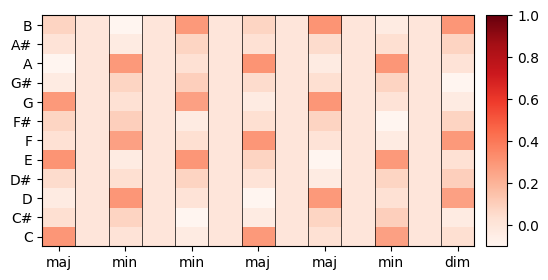

In [127]:
import circularPitchSpace as cps
from circularPitchSpace import pitch_classes,sym3,sym,checkIndex,drawLabel
import matplotlib.pyplot as plt
import matplotlib
import librosa
import numpy as np
import mir_eval
import features

plt.rcParams['text.usetex'] = False
# Figure of triads in a key
chord_qualities = ["maj","min","min","maj","maj","min","dim"] 
root_notes = [0,2,4,5,7,9,11]

halftones= ["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]

templates = [mir_eval.chord.quality_to_bitmap(x) for x in chord_qualities]
templates = np.array(templates,dtype=float)+ (np.random.rand(12)-0.5)
templates = templates / np.expand_dims(np.sum(templates,axis=1),axis=1)
for i,root in enumerate(root_notes):
    templates[i,:] = np.roll(templates[i,:],root)
image = np.zeros((2*templates.shape[0]-1,12),dtype=float)
for i,n in zip(range(0,2*templates.shape[0]-1,2),range(templates.shape[0])):
    image[i,:] = templates[n,:]

fig = plt.figure(figsize=(6,3))
gs = matplotlib.gridspec.GridSpec(1, 2,width_ratios=(20,1),wspace=0.05)
ax= fig.add_subplot(gs[0])
img = ax.imshow(image.T,origin='lower',cmap="Reds",vmax=1, aspect='auto')
ax.set_yticks(range(0,12))
ax.set_yticklabels(halftones)
ax.set_xticks(range(0,2*templates.shape[0]-1,2))
ax.set_xticklabels(chord_qualities)
ax.vlines(np.arange(0.5,2*templates.shape[0]-0.5,1),-0.5,11.5,'k',linewidth=0.5)
ax= fig.add_subplot(gs[1])
plt.colorbar(img,cax=ax); 



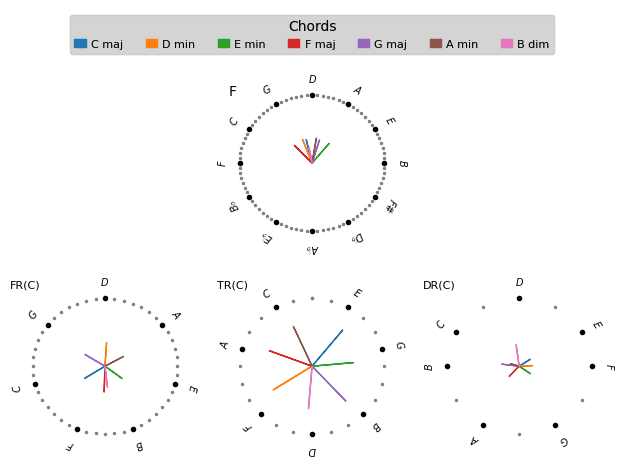

In [130]:
fig = plt.figure(figsize=(7.4,5.6))
gs = matplotlib.gridspec.GridSpec(3, 3,width_ratios=(1,1,1),height_ratios=(0.5,3,3), hspace=0.5,wspace=0.3)
ax0 = fig.add_subplot(gs[0,:])
ax10 =  fig.add_subplot(gs[1,1])
ax11 =  fig.add_subplot(gs[2,0])
ax20 =  fig.add_subplot(gs[2,1])
ax21 =  fig.add_subplot(gs[2,2])

cps.plotCircleOfFifths(ax10)
cps.plotCircleOfFifthsRelated(ax11,0)
cps.plotCircleOfThirdsRelated(ax20,0,False)
cps.plotCircleOfDiatonicRelated(ax21,0)
colors = list(matplotlib.colors.TABLEAU_COLORS.keys())
colors.extend(["magenta","cyan"])
# plot features
normalize = False
r_F,r_FR,r_TR,r_DR = cps.transformChroma(templates,alterations=False)

for i in range(len(chord_qualities)):
    cps.plotVector(ax10,r_F[i],color = colors[i%len(colors)])
    cps.plotVector(ax11,r_FR[i,0],norm=normalize, color = colors[i%len(colors)])
    cps.plotVector(ax20,r_TR[i,0],norm=normalize, color = colors[i%len(colors)])
    cps.plotVector(ax21,r_DR[i,0],color = colors[i%len(colors)])

#create legend
labels =  [halftones[x]+" "+quality for quality,x in zip(chord_qualities,root_notes)]
legend_handles = [matplotlib.patches.Patch(color=color) for color in colors]
legend = ax0.legend(legend_handles, labels,ncol =len(labels) , loc='center', bbox_to_anchor=(0.5, 0), title='Chords', handlelength=1, handletextpad=0.5, fontsize=8, title_fontsize=10, facecolor='lightgray', framealpha=0.8)
ax0.add_artist(legend)
ax0.axis(False);

Leiterfremde Akkorde können nicht ohne weiteres im Symmetriemodell dargestellt werden. Jedoch ist es möglich den Terzkreis fortlaufend darzustellen, sprich zu beiden seiten zu erweitern.
Alterierte Töne können auf diese weise dargestellt werden, hoch- bzw. tiefalterierte Töne finden sich an unterschiedlichen stellen im kreis wieder.
Setzt man eine Terzschichtung voraus (und ist zumindest eine Terz oder Quint vorhanden), wird ersichtlich ob ein Chromabin hoch- oder tiefalterierte töne enthält. 


Symmetriemodell, Herleitung und Aufbau


C
C
C
N
C:maj
C:min
C:dim
C:aug
C:maj7
C:minmaj7
C:hdim7
C:dim7


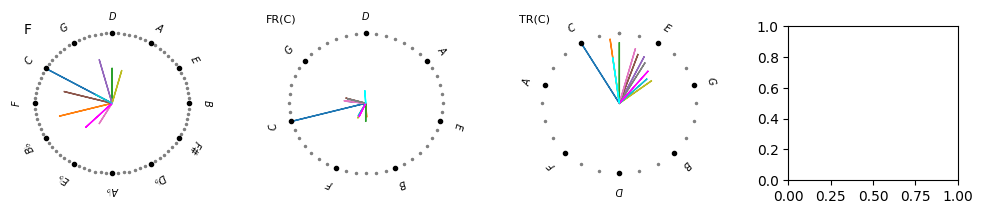

In [72]:
# Dictionary holding the number of accidentals (flats are counted negative, crosses positive) for each pitch class
accidentals = {"Cb":-7,"C":0,"C#":7,"Db":-5,"D":2,"D#":9,"Eb":-3,"E":5,"E#":11,"Fb":-8,"F":-1,"F#":6,"Gb":-6,"G":1,"G#":8,"Ab":-4,"A":3,"A#":10,"Bb":-2,"B":5,"B#":12}
chromatic_index = {"Cb":-3,"C":-2,"C#":-1,"Db":-1,"D":0,"D#":1,"Eb":1,"E":2,"E#":3,"Fb":2,"F":3,"F#":4,"Gb":4,"G":5,"G#":-6,"Ab":-6,"A":-5,"A#":-4,"Bb":-4,"B":-3,"B#":-2}

def chordRecognition(chromavector,threshold=0.1):
    notes = applyNoteThreshold(templates[i,:],threshold)
    chord = stackThirds(notes) 
    if not chord:
        return "N"

    pc_index,label,n_f = getNoteLabels(chord,key)
    getNotesInKey(pc_index,n_f)
    # project chord onto pitch space
    r_fr = r_tr = r_f = 0
    for j in range(len(pc_index)):
        n_fr = cps.sym(n_f[j] - 7*n_k, 48)
        n_tr = cps.sym(n_f[j] - 7*n_k - 12, 24)
        r_f +=  templates[i,pc_index[j]] * np.exp(-1j*2*np.pi*(n_f[j]/84))
        r_fr += templates[i,pc_index[j]] * np.exp(-1j*2*np.pi*(n_fr/48))
        r_tr += templates[i,pc_index[j]] * np.exp(-1j*2*np.pi*(n_tr/24))
    # plot vector
    cps.plotVector(axes[0],r_f,color = colors[i%len(colors)])
    cps.plotVector(axes[1],r_fr,color = colors[i%len(colors)])
    cps.plotVector(axes[2],r_tr,color = colors[i%len(colors)])

    root = label[0]
    quality=""
    intervals = [y-x for x,y in itertools.pairwise(pc_index)]
    # TRIAD
    if len(intervals) == 2: 
        if intervals ==  [4,3]:
            quality = "maj"
        elif intervals ==  [3,4]:
            quality = "min"
        elif intervals ==  [3,3]:
            quality = "dim"
        elif intervals == [4,4]:
            quality = "aug"
    elif len(intervals) == 3:
        if intervals ==  [4,3,3]:
            quality = "7"
        elif intervals ==  [4,3,4]:
            quality = "maj7"
        elif intervals ==  [3,4,3]:
            quality = "min7"
        elif intervals == [3,4,4]:
            quality = "minmaj7"
        elif intervals == [3,3,3]:
            quality = "dim7"
        elif intervals == [3,3,4]:
            quality = "hdim7"
    elif len(intervals) > 3:
        quality="9"
    return mir_eval.chord.join(root, quality)


def applyNoteThreshold(chromavector,threshold):
    notes = np.argwhere(chromavector > threshold).flatten().tolist()
    return notes

def stackThirds(notes):
    for note_combination in itertools.permutations(notes,len(notes)):
        valid_chord = True
        for interval in itertools.pairwise(note_combination):
            diff = interval[1] - interval[0]
            if(interval[1] - interval[0]) < 0:
                diff = interval[1] - interval[0] + 12 
            if diff < 3 or diff > 4:
                valid_chord = False
                break
        if valid_chord:
            break
    if valid_chord:
        return note_combination
    else:
        return None

def getNoteLabels(chord_pc_index,key):
    chord_nf = []
    chord_labels = []
    missing_notes = []
    # calculate index n_f for each note
    for i,chroma_index in enumerate(chord_pc_index):
        n_c = cps.pitch_classes[chroma_index].chromatic_index
        n_f = sym3(49*n_c,84,7*n_k)
        if -21 <= (n_f-7*n_k) <= 21:
            chord_nf.append(n_f)
            chord_labels.append(cps.pitch_classes[chroma_index].name)
        else:
            # calculate both possible indices for enharmonic notes
            n_f_0 = (accidentals[cps.pitch_classes[chroma_index].name] - 2) * 7
            n_f_1 = (accidentals[cps.enharmonic_notes[cps.pitch_classes[chroma_index].name]] - 2) * 7
            chord_nf.append([n_f_0,n_f_1])
            chord_labels.append(None)
            missing_notes.append(i)

    for start_index in itertools.cycle(missing_notes):
        try:
            # find first missing label
            start_index = chord_labels.index(None,start_index)
            # check if missing label is at start, end or in between and find a fitting chordlabel
            if start_index == 0:
                # if there is an existing note next to our missing note, we can find the best match
                if(chord_labels[start_index+1]):
                    diff_0 = abs(chord_nf[start_index+1] - chord_nf[start_index][0])
                    diff_1 = abs(chord_nf[start_index+1] - chord_nf[start_index][1])
                else:
                    continue
            else:
                if(chord_labels[start_index-1]):
                    diff_0 = abs(chord_nf[start_index-1] - chord_nf[start_index][0])
                    diff_1 = abs(chord_nf[start_index-1] - chord_nf[start_index][1])
                else:
                    if(chord_labels[start_index+1]):
                        diff_0 = abs(chord_nf[start_index+1] - chord_nf[start_index][0])
                        diff_1 = abs(chord_nf[start_index+1] - chord_nf[start_index][1])
                    else:
                        continue
            # evaluate distance in TR and pick the note closer to its neighbouring note.
            if diff_0 < diff_1:
                chord_labels[start_index] = cps.pitch_classes[chord_pc_index[start_index]].name
                chord_nf[start_index] = chord_nf[start_index][0]
            else:
                chord_labels[start_index] = cps.enharmonic_notes[cps.pitch_classes[chord_pc_index[start_index]].name]
                chord_nf[start_index] = chord_nf[start_index][1]
        except ValueError:
            # no missing chord labels found after starting index
            if len([x for x in chord_labels if x is None]) == 0:
                break
            else:
                continue
    return chord_pc_index,chord_labels,chord_nf
    
pitch_class = "E"
key = "C"
# get pitch class index in circle of fifths from number of accidentals
n_f = (accidentals[pitch_class] - 2) * 7
# represent the pitch class in FR,TR,DR in the key of C
n_k = accidentals[key]


fig = plt.figure(figsize=(12,2))
gs = matplotlib.gridspec.GridSpec(1, 4,width_ratios=(1,1,1,1), hspace=0.5,wspace=0.5)
axes = [fig.add_subplot(gs[i]) for i in range(4)]
cps.plotCircleOfFifths(axes[0])
cps.plotCircleOfFifthsRelated(axes[1],0)
cps.plotCircleOfThirdsRelated(axes[2],0,False)
colors = list(matplotlib.colors.TABLEAU_COLORS.keys())
colors.extend(["magenta","cyan"])

# pitch class energy
pc_energy = cps.getPitchClassEnergyProfile(templates,threshold=0.1)


# for all time instances
for i in range(12):
    chord = chordRecognition(templates[i,:], threshold=0.1)
    print(chord)


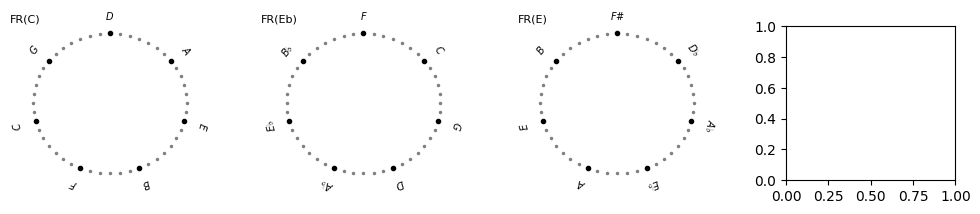

In [73]:
fig = plt.figure(figsize=(12,2))
gs = matplotlib.gridspec.GridSpec(1, 4,width_ratios=(1,1,1,1), hspace=0.5,wspace=0.5)
axes = [fig.add_subplot(gs[i]) for i in range(4)]
cps.plotCircleOfFifthsRelated(axes[0],0)
cps.plotCircleOfFifthsRelated(axes[1],3)
cps.plotCircleOfFifthsRelated(axes[2],4)